In [12]:
import numpy as np
import torch
import torchvision
from torchvision import models, transforms
from PIL import Image
import matplotlib.pyplot as plt
import json

In [13]:
print("Pytorch version ", torch.__version__)
print("Torchvision version ", torchvision.__version__)

Pytorch version  1.10.2
Torchvision version  0.11.3


In [14]:
use_pretrained = True
net = models.vgg16(pretrained=use_pretrained)
net.eval()
print(net)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [15]:
class BaseTransform():
    def __init__(self, resize, mean, std):
        self.base_transform = transforms.Compose([
            transforms.Resize(resize),
            transforms.CenterCrop(resize),
            transforms.ToTensor(),
            transforms.Normalize(mean, std)
        ])
    def __call__(self, img):
        return self.base_transform(img)

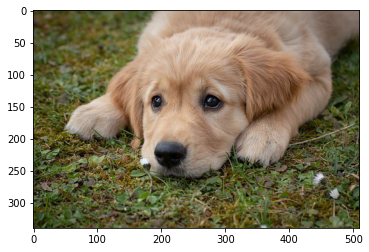

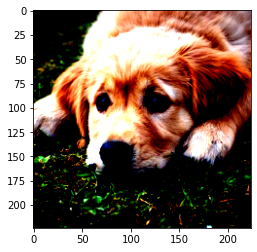

In [18]:
image_file_path = "./dog.jpg"
img = Image.open(image_file_path)

plt.imshow(img)
plt.show()

resize = 224
mean = (0.485, 0.456, 0.406) 
std = (0.229, 0.224, 0.225)

transform = BaseTransform(resize, mean, std) # Tạo ra transform
img_transformed = transform(img) #transform ảnh input

#(chanels, height, width) -> (height, width, channels) 
#clip (0,1)
img_transformed = img_transformed.numpy().transpose(1,2,0)
img_transformed = np.clip(img_transformed, 0, 1)

plt.imshow(img_transformed)
plt.show()

In [19]:
class Predictor():
    def __init__(self, class_index):
        self.class_index = class_index
    
    def predict_max(self, out):
        maxid = np.argmax(out.detach().numpy())
        predicted_label_name = self.class_index[str(maxid)]
        
        return predicted_label_name

class_index = json.load(open('./imagenet_class_index.json', 'r'))
predictor = Predictor(class_index)

In [20]:
img_file_path = './data/cute-puppy-body-image.jpg'
img = Image.open(image_file_path)

resize = 224
mean = (0.485, 0.456, 0.406) 
std = (0.229, 0.224, 0.225)
transform = BaseTransform(resize, mean, std)
img_transformed = transform(img)
img_transformed = img_transformed.unsqueeze_(0)

out = net(img_transformed)
result = predictor.predict_max(out)
print("Result is:", result)

Result is: ['n02099601', 'golden_retriever']
